# TAREA 2: Comparación de métodos
Seleccione al menos dos algoritmos de los disponibles en la bibliotecas indicadas. Seleccione al menos tres problemas
semi-supervisados de los repositorios indicados.
Realice las siguientes tareas:
1. Aplique los algoritmos seleccionados a los datasets
2. Compare los resultados y explique qué conclusiones se podrían obtener

Implementaciones en Python:
- https://scikit-learn.org/stable/modules/semi_supervised.html
- https://github.com/tmadl/semisup-learn
- https://github.com/rosefun/SemiSupervised
- https://pythonrepo.com/tag/semi-supervised-learning

NOTA: Se pueden simular datasets semi-supervisados simplemente eliminando los etiquetas de un cierto porcentaje
de instancias.

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Inicializar las variables
test_size = 0.5
random_state = 42

# Función para actualizar las variables y mostrar el resultado
def actualizar_variables(b):
    global test_size, random_state
    test_size = test_size_widget.value
    random_state = random_state_widget.value
    print(f"test_size actualizado a: {test_size}")
    print(f"random_state actualizado a: {random_state}")

# Crear widgets para controlar test_size y random_state
test_size_widget = widgets.FloatSlider(
    value=test_size,
    min=0.05,
    max=0.95,
    step=0.01,
    description="Test Size:",
    continuous_update=False
)

random_state_widget = widgets.IntText(
    value=random_state,
    description="Random State:"
)

# Crear botón de confirmación
confirmar_button = widgets.Button(description="Confirmar")

# Vincular el botón a la función de actualización
confirmar_button.on_click(actualizar_variables)

# Mostrar los widgets y el botón
display(test_size_widget, random_state_widget, confirmar_button)



FloatSlider(value=0.5, continuous_update=False, description='Test Size:', max=0.95, min=0.05, step=0.01)

IntText(value=42, description='Random State:')

Button(description='Confirmar', style=ButtonStyle())

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets # Importar Datasets
from sklearn import semi_supervised

## Preparación de los Datasets

- Iris (150x4)
- Digits (1797x64)
- Wine (178x13)

Se ha intentado utilizar la S3VM, pero la librería no está actualizada y da un error al ejecutar el código de prueba. Al parecer, utiliza un tipo de dato que ya no es compatible con NumPy, np.matrix. (https://github.com/rosefun/SemiSupervised/tree/master)

Por tanto, utilizaré los modelos:
- Label Propagation (https://scikit-learn.org/stable/modules/semi_supervised.html)
- Self-Training (https://scikit-learn.org/stable/modules/semi_supervised.html)


In [4]:
# Dataset Iris
Iris_X, Iris_y = datasets.load_iris(return_X_y=True)
# Convertimos en DataFrame
Iris_X = pd.DataFrame(Iris_X)
Iris_y = pd.DataFrame(Iris_y)

# Dataset Digits
Digits_X, Digits_y = datasets.load_digits(return_X_y=True)
Digits_X = pd.DataFrame(Digits_X)
Digits_y = pd.DataFrame(Digits_y)
# Dataset Wine
Wine_X, Wine_y = datasets.load_wine(return_X_y=True)
Wine_X = pd.DataFrame(Wine_X)
Wine_y = pd.DataFrame(Wine_y)

Visualizamos los datos de los tres datasets

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def visualizar_datos(title, X, y, num_dimensiones=3):
    """
    Visualiza los datos en 2D o 3D usando PCA. Admite X e y como DataFrames o arrays.

    :param title: Título de la gráfica
    :param X: Datos de entrada
    :param y: Etiquetas de clase
    :param num_dimensiones: Número de dimensiones para la gráfica (2 o 3)
    """
    if num_dimensiones not in [2, 3]:
        raise ValueError("El número de dimensiones debe ser 2 o 3.")

    # Convertir a NumPy arrays si son DataFrames
    X = X.values if hasattr(X, 'values') else X
    y = y.values.ravel() if hasattr(y, 'values') else y

    # Verificar dimensiones de X e y
    if len(X) != len(y):
        raise ValueError("El número de muestras en X e y debe ser el mismo.")

    # Reducir dimensiones con PCA
    pca = PCA(n_components=num_dimensiones)
    X_pca = pca.fit_transform(X)

    fig = plt.figure(figsize=(6, 6))
    clases = np.unique(y)
    colores = plt.cm.viridis(np.linspace(0, 1, len(clases)))

    if num_dimensiones == 3:
        ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
        for clase, color in zip(clases, colores):
            indices = (y == clase)  # Índices booleanos
            if clase == -1:
                ax.scatter(
                    X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2],
                    c='gray', label="Sin etiquetar", edgecolor='black', s=100, alpha=0.6
                )
            else:
                ax.scatter(
                    X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2],
                    c=[color], label=f"Clase {clase}", s=50
                )
        ax.set_xlabel("Componente Principal 1")
        ax.set_ylabel("Componente Principal 2")
        ax.set_zlabel("Componente Principal 3")

    elif num_dimensiones == 2:
        ax = fig.add_subplot(111)
        for clase, color in zip(clases, colores):
            indices = (y == clase)  # Índices booleanos
            if clase == -1:
                ax.scatter(
                    X_pca[indices, 0], X_pca[indices, 1],
                    c='gray', label="Sin etiquetar", edgecolor='black', s=100, alpha=0.6
                )
            else:
                ax.scatter(
                    X_pca[indices, 0], X_pca[indices, 1],
                    c=[color], label=f"Clase {clase}", s=50
                )
        ax.set_xlabel("Componente Principal 1")
        ax.set_ylabel("Componente Principal 2")

    ax.set_title(title)
    plt.legend(title="Clases", loc='best')
    plt.tight_layout()
    plt.grid(True)
    plt.show()



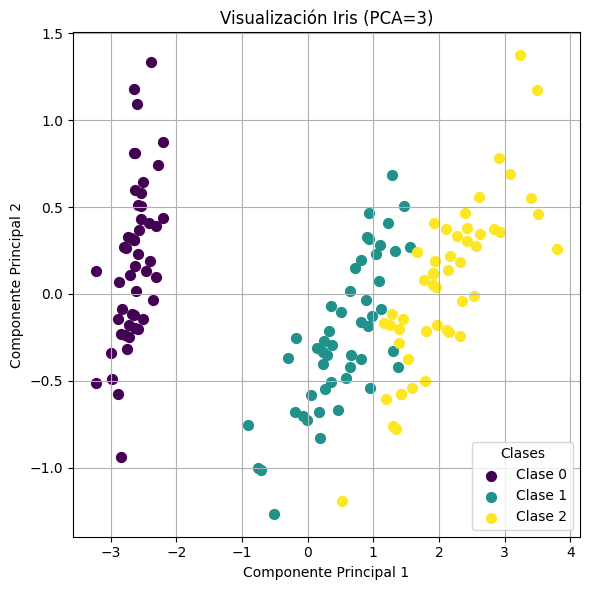

In [6]:
visualizar_datos("Visualización Iris (PCA=3)",Iris_X, Iris_y, 2)

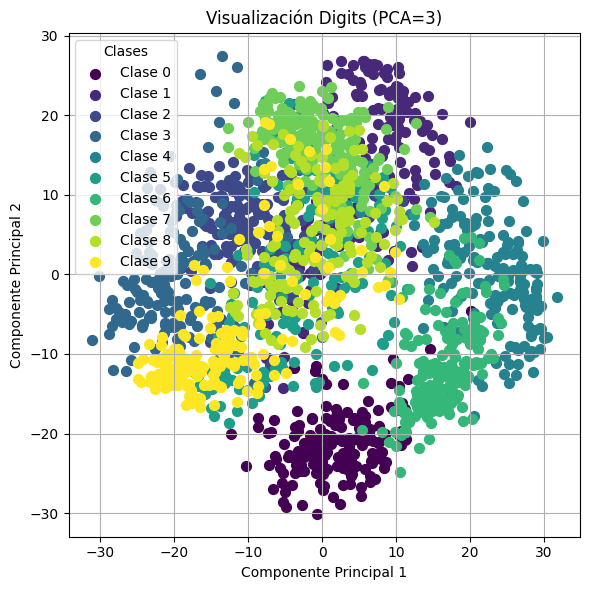

In [7]:
visualizar_datos("Visualización Digits (PCA=3)", Digits_X, Digits_y, 2)

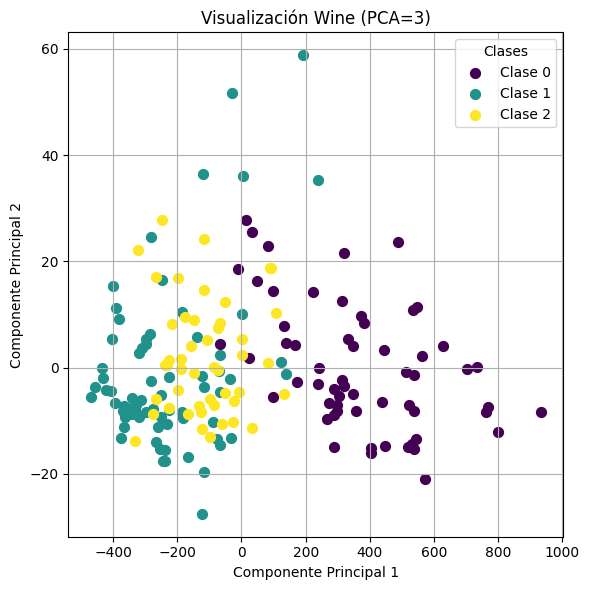

In [8]:
visualizar_datos("Visualización Wine (PCA=3)", Wine_X, Wine_y, 2)

## Modificación de los datasets para poder utilizarlos en Aprendizaje SemiSupervisado.


In [9]:
from sklearn.model_selection import train_test_split
# Iris
Iris_X_label, Iris_X_unlabel, Iris_y_label, Iris_y_unlabel = train_test_split(Iris_X, Iris_y, random_state=random_state, test_size=test_size)

# Convertimos las etiquetas Iris_y_unlabel a -1
Iris_y_unlabel_final = pd.DataFrame(np.full(len(Iris_y_unlabel), -1), index=Iris_y_unlabel.index)

# Concatenamos los DataFrames
Iris_X_SSL = pd.concat([Iris_X_label, Iris_X_unlabel])
Iris_y_SSL = pd.concat([Iris_y_label, Iris_y_unlabel_final])

# Normalización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Iris_X_SSL = pd.DataFrame(scaler.fit_transform(Iris_X_SSL), index=Iris_X_SSL.index, columns=Iris_X_SSL.columns)

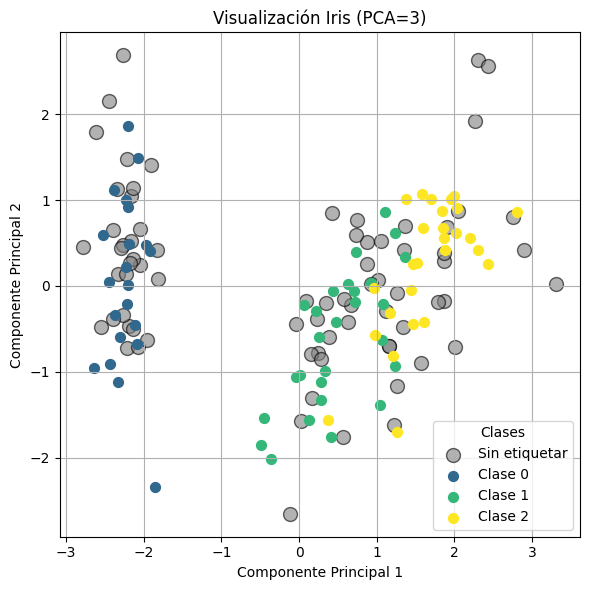

In [10]:
visualizar_datos("Visualización Iris (PCA=3)",Iris_X_SSL, Iris_y_SSL, 2)

In [11]:
# Digits
Digits_X_label, Digits_X_unlabel, Digits_y_label, Digits_y_unlabel = train_test_split(Digits_X, Digits_y, random_state=random_state, test_size=test_size)
Digits_y_unlabel_final = pd.DataFrame(np.full(len(Digits_y_unlabel), -1), index=Digits_y_unlabel.index)
Digits_X_SSL = pd.concat([Digits_X_label, Digits_X_unlabel])
Digits_y_SSL = pd.concat([Digits_y_label, Digits_y_unlabel_final])

# Normalización
scaler = StandardScaler()
Digits_X_SSL = pd.DataFrame(scaler.fit_transform(Digits_X_SSL),index=Digits_X_SSL.index)

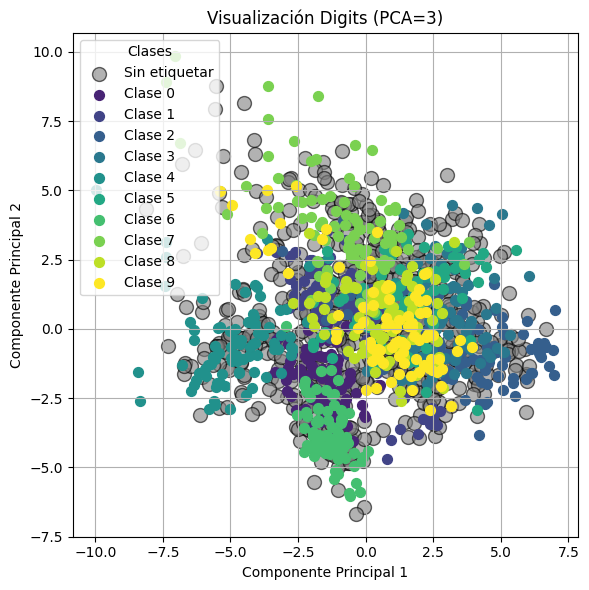

In [12]:
visualizar_datos("Visualización Digits (PCA=3)", Digits_X_SSL, Digits_y_SSL, 2)

In [13]:
# Wine
Wine_X_label, Wine_X_unlabel, Wine_y_label, Wine_y_unlabel = train_test_split(Wine_X, Wine_y, random_state=random_state, test_size=test_size)
Wine_y_unlabel_final = pd.DataFrame(np.full(len(Wine_y_unlabel), -1), index=Wine_y_unlabel.index)
Wine_X_SSL = pd.concat([Wine_X_label, Wine_X_unlabel])
Wine_y_SSL = pd.concat([Wine_y_label, Wine_y_unlabel_final])

# Normalización
scaler = StandardScaler()
Wine_X_SSL = pd.DataFrame(scaler.fit_transform(Wine_X_SSL), index=Wine_X_SSL.index)

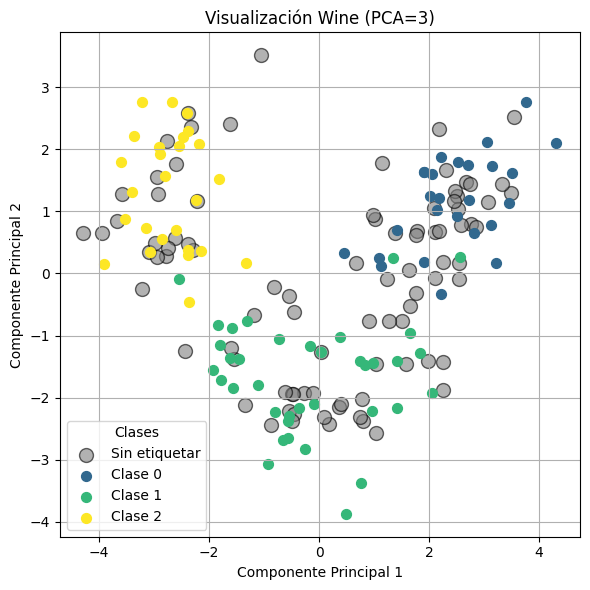

In [14]:
visualizar_datos("Visualización Wine (PCA=3)", Wine_X_SSL, Wine_y_SSL, 2)

A modo de resumen tenemos:
- X_SSL: Contiene todos los puntos del dataset etiquetados como no etiquetados.
- y_SSL: Contiene todas las etiquetas del dataset tanto etiquetadas como no etiquetadas.
- y_unlabel: Contiene las etiquetas del dataset no etiquetado para evaluar más adelante

# Algoritmo de Self Training

In [15]:
# Algoritmo de SelfTraining
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier

# Iris
Iris_self_training_model = SelfTrainingClassifier(RandomForestClassifier(), max_iter=100, verbose=True)
Iris_self_training_model.fit(Iris_X_SSL, Iris_y_SSL.values.flatten())
Iris_SSL_indices = Iris_X_SSL[Iris_y_SSL[0] == -1].index

# Ordenamos los datos
Iris_X_SSL = Iris_X_SSL.sort_index()
Iris_y_SSL = Iris_y_SSL.sort_index()
Iris_y_real = Iris_y.sort_index()

End of iteration 1, added 73 new labels.


In [16]:
# Digits
Digits_self_training_model = SelfTrainingClassifier(RandomForestClassifier(), max_iter=100, verbose=True)
Digits_self_training_model.fit(Digits_X_SSL, Digits_y_SSL.values.flatten())
Digits_SSL_indices = Digits_X_SSL[Digits_y_SSL[0] == -1].index

# Ordenamos los datos
Digits_X_SSL = Digits_X_SSL.sort_index()
Digits_y_SSL = Digits_y_SSL.sort_index()
Digits_y_real = Digits_y.sort_index()

End of iteration 1, added 470 new labels.
End of iteration 2, added 63 new labels.
End of iteration 3, added 36 new labels.
End of iteration 4, added 14 new labels.
End of iteration 5, added 13 new labels.
End of iteration 6, added 10 new labels.
End of iteration 7, added 6 new labels.
End of iteration 8, added 8 new labels.
End of iteration 9, added 6 new labels.
End of iteration 10, added 2 new labels.
End of iteration 11, added 3 new labels.
End of iteration 12, added 2 new labels.
End of iteration 13, added 3 new labels.
End of iteration 14, added 3 new labels.
End of iteration 15, added 4 new labels.
End of iteration 16, added 2 new labels.
End of iteration 17, added 1 new labels.
End of iteration 18, added 3 new labels.


In [17]:
# Wine
Wine_self_training_model = SelfTrainingClassifier(RandomForestClassifier(), max_iter=100, verbose=True)
Wine_self_training_model.fit(Wine_X_SSL, Wine_y_SSL.values.flatten())
Wine_SSL_indices = Wine_X_SSL[Wine_y_SSL[0] == -1].index

# Ordenamos los datos
Wine_X_SSL = Wine_X_SSL.sort_index()
Wine_y_SSL = Wine_y_SSL.sort_index()
Wine_y_real = Wine_y.sort_index()

End of iteration 1, added 68 new labels.
End of iteration 2, added 4 new labels.
End of iteration 3, added 1 new labels.


## Visualización de Predicciones de SelfTraining

Calculamos las predicciones de cada dataset

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def visualizar_resultados_SSL(X_final, y_reales, y_predichas, Dataset_SSL_indices):
    """
    Visualiza los puntos de un dataset semisupervisado en 2D usando PCA.
    Los puntos tienen colores según las clases reales, y las estrellas
    sobre los puntos no etiquetados tienen colores según las clases predichas.

    :param X_final: DataFrame con los datos de entrada (todos los puntos).
    :param y_reales: Series o array con las etiquetas reales de los puntos.
    :param y_predichas: Series o array con las etiquetas predichas por el modelo.
    :param Dataset_SSL_indices: Índices de los puntos no etiquetados usados en el proceso SSL.
    """
    # Reducir a 2D usando PCA
    pca = PCA(n_components=2)
    X_final_pca = pca.fit_transform(X_final)

    # Crear un mapa de colores para las clases
    clases_reales = np.unique(y_reales)
    colores_reales = plt.cm.viridis(np.linspace(0, 1, len(clases_reales)))

    # Crear la gráfica
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)

    # Graficar puntos con colores según sus etiquetas reales
    for clase, color in zip(clases_reales, colores_reales):
        indices = y_reales == clase
        ax.scatter(
            X_final_pca[indices, 0], X_final_pca[indices, 1],
            c=[color], label=f"Clase Real {int(clase)}", s=50, alpha=0.8
        )

    # # Graficar estrellas para los puntos no etiquetados según las clases predichas
    for idx in Dataset_SSL_indices:
        clase_predicha = y_predichas[idx]
        color_predicho = colores_reales[np.where(clases_reales == clase_predicha)[0][0]]
        ax.scatter(
            X_final_pca[idx, 0], X_final_pca[idx, 1],
            c=[color_predicho], marker='*', s=200, edgecolor=[color_predicho], alpha=0.50,
            label=f"Predicción Clase {int(clase_predicha)}" if f"Predicción Clase {int(clase_predicha)}" not in plt.gca().get_legend_handles_labels()[1] else ""
        )

    # Configuración de la gráfica
    plt.title("Visualización del Dataset Semisupervisado con PCA")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc='best', title="Leyenda")
    plt.grid(True)
    plt.show()



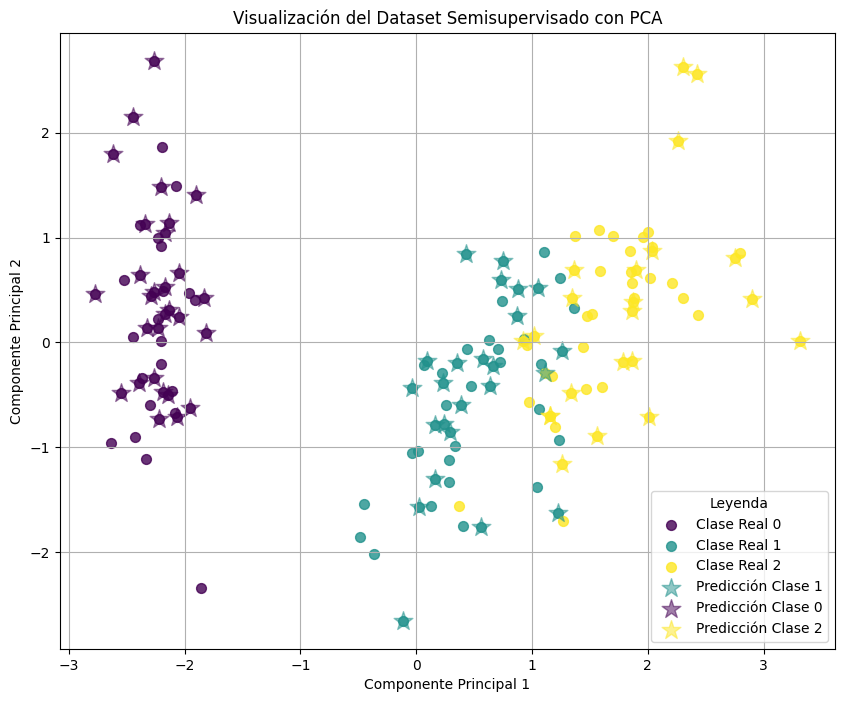

In [19]:
# Iris
Iris_y_pred = Iris_self_training_model.predict(Iris_X_SSL)
visualizar_resultados_SSL(Iris_X_SSL, Iris_y_real.values.flatten(), Iris_y_pred, Iris_SSL_indices)

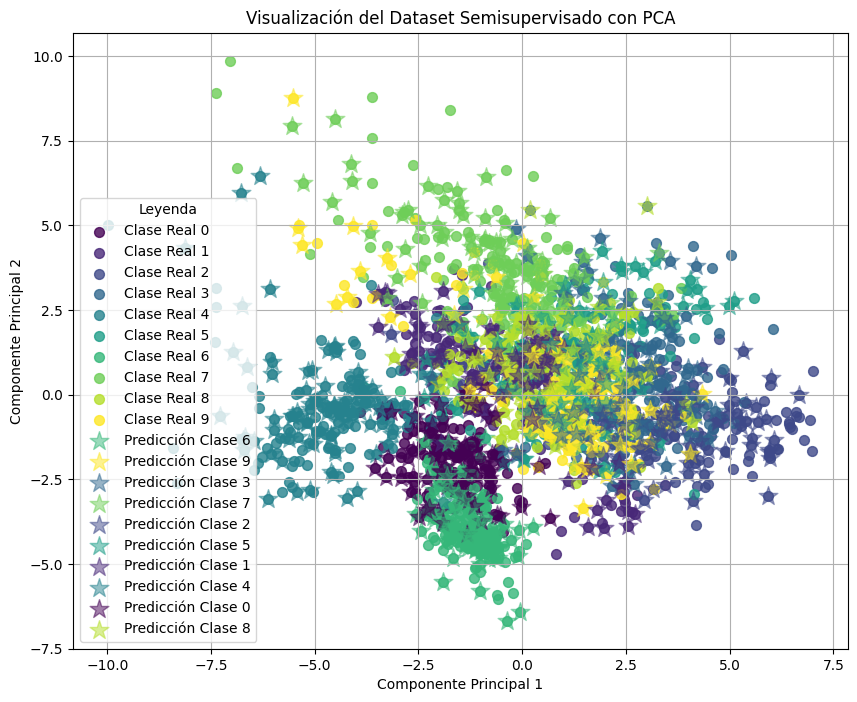

In [20]:
# Digits
Digits_y_pred = Digits_self_training_model.predict(Digits_X_SSL)
visualizar_resultados_SSL(Digits_X_SSL, Digits_y_real.values.flatten(), Digits_y_pred, Digits_SSL_indices)

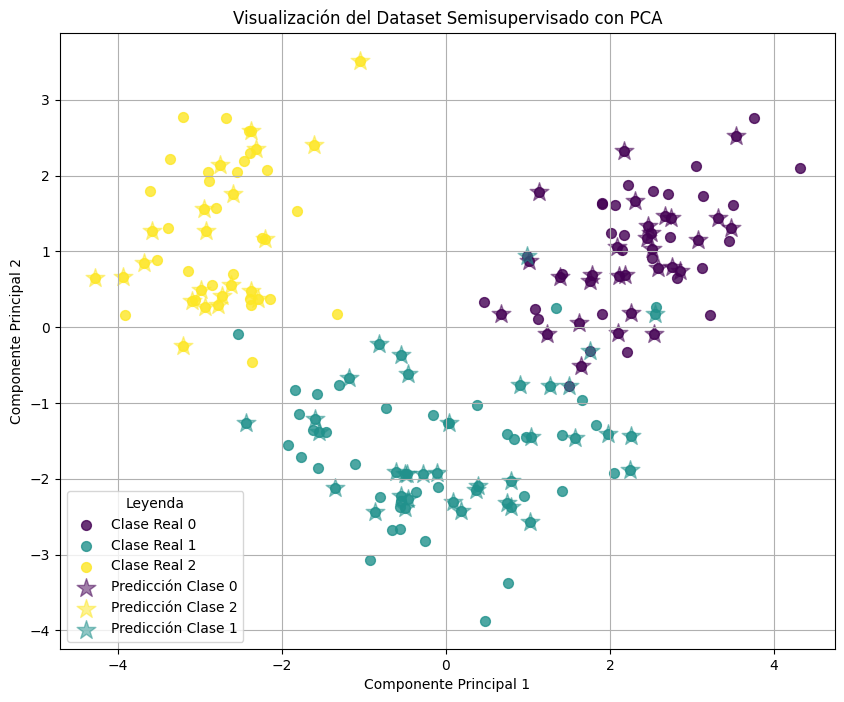

In [21]:
# Wine
Wine_y_pred = Wine_self_training_model.predict(Wine_X_SSL)
visualizar_resultados_SSL(Wine_X_SSL, Wine_y_real.values.flatten(), Wine_y_pred, Wine_SSL_indices)

## Evaluación del algoritmo SelfTraining

### Matriz de Confusión

[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]


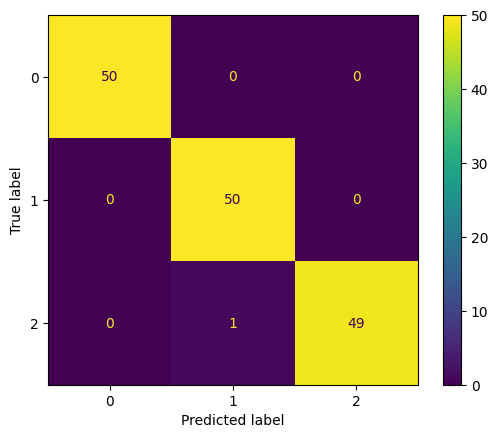

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Iris
Iris_cm = confusion_matrix(Iris_y_real.values.flatten(), Iris_y_pred)
print(Iris_cm)
ConfusionMatrixDisplay(confusion_matrix=Iris_cm).plot()

[[177   0   0   0   1   0   0   0   0   0]
 [  0 180   2   0   0   0   0   0   0   0]
 [  0   1 176   0   0   0   0   0   0   0]
 [  0   0   0 173   0   1   0   2   5   2]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   1   0   1   1 175   1   0   1   2]
 [  1   1   0   0   1   0 178   0   0   0]
 [  0   0   0   0   0   0   0 178   0   1]
 [  0   4   0   0   0   0   0   1 168   1]
 [  0   0   0   0   0   1   0   5   2 172]]


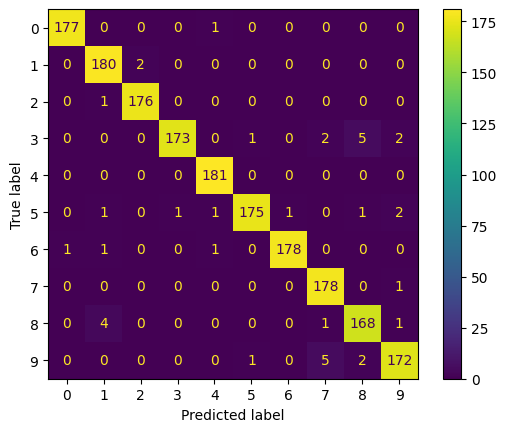

In [23]:
# Digits
Digits_cm = confusion_matrix(Digits_y_real.values.flatten(), Digits_y_pred)
print(Digits_cm)
ConfusionMatrixDisplay(confusion_matrix=Digits_cm).plot()

[[56  3  0]
 [ 0 71  0]
 [ 0  0 48]]


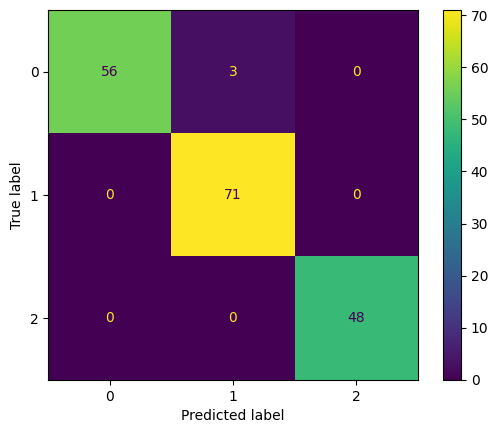

In [24]:
# Wine
Wine_cm = confusion_matrix(Wine_y_real.values.flatten(), Wine_y_pred)
print(Wine_cm)
ConfusionMatrixDisplay(confusion_matrix=Wine_cm).plot()

### Metrics Report

In [25]:
# Iris Report
Iris_report = classification_report(Iris_y_real.values.flatten(), Iris_y_pred)
print(Iris_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [26]:
# Digits Report
Digits_report = classification_report(Digits_y_real.values.flatten(), Digits_y_pred)
print(Digits_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.96      0.99      0.98       182
           2       0.99      0.99      0.99       177
           3       0.99      0.95      0.97       183
           4       0.98      1.00      0.99       181
           5       0.99      0.96      0.97       182
           6       0.99      0.98      0.99       181
           7       0.96      0.99      0.98       179
           8       0.95      0.97      0.96       174
           9       0.97      0.96      0.96       180

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797



In [27]:
# Wine Report
Wine_report = classification_report(Wine_y_real.values.flatten(), Wine_y_pred)
print(Wine_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.96      1.00      0.98        71
           2       1.00      1.00      1.00        48

    accuracy                           0.98       178
   macro avg       0.99      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



## Conclusiones

El algoritmo de Self Training funciona correctamente con los datasets propuestos obteniendo mejores resultados en los datasets más sencillos, como era de esperar. Aún así, en el dataset de Digits, que tiene 10 clases y una mayor cantidad de ejemplos que los otros dos, obtiene buenos resultados también.

Cabe esperar que, si le aumentamos el porcentaje de ejemplos sin etiquetar, los resultados serán peores.

# Algoritmo de Label Propagation

In [28]:
# Label Propagation
from sklearn.semi_supervised import LabelPropagation

n_neighbors = 20

# Iris
Iris_lp_model = LabelPropagation(kernel='knn', n_neighbors=n_neighbors)
Iris_lp_model.fit(Iris_X_SSL, Iris_y_SSL.values.flatten())
Iris_SSL_indices = Iris_X_SSL[Iris_y_SSL[0] == -1].index

# Ordenamos los datos
Iris_X_SSL = Iris_X_SSL.sort_index()
Iris_y_SSL = Iris_y_SSL.sort_index()
Iris_y_real = Iris_y.sort_index()

In [29]:
# Digits
Digits_lp_model = LabelPropagation(kernel='knn', n_neighbors=n_neighbors)
Digits_lp_model.fit(Digits_X_SSL, Digits_y_SSL.values.flatten())
Digits_SSL_indices = Digits_X_SSL[Digits_y_SSL[0] == -1].index

# Ordenamos los datos
Digits_X_SSL = Digits_X_SSL.sort_index()
Digits_y_SSL = Digits_y_SSL.sort_index()
Digits_y_real = Digits_y.sort_index()

In [30]:
# Wine
Wine_lp_model = LabelPropagation(kernel='knn', n_neighbors=n_neighbors)
Wine_lp_model.fit(Wine_X_SSL, Wine_y_SSL.values.flatten())
Wine_SSL_indices = Wine_X_SSL[Wine_y_SSL[0] == -1].index

# Ordenamos los datos
Wine_X_SSL = Wine_X_SSL.sort_index()
Wine_y_SSL = Wine_y_SSL.sort_index()
Wine_y_real = Wine_y.sort_index()

## Visualización de Predicciones de Label Propagation

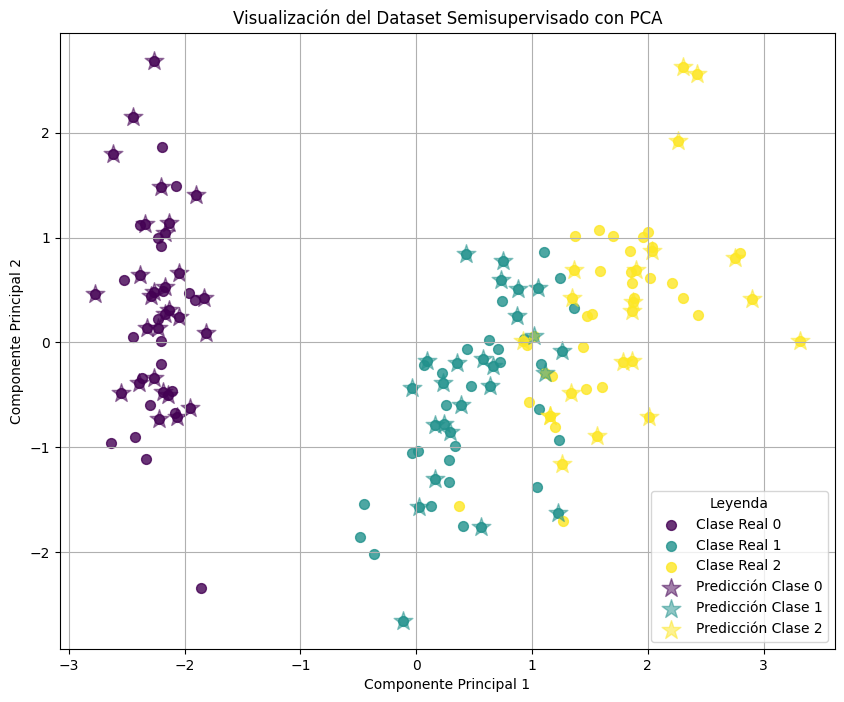

In [31]:
# Iris
Iris_y_pred = Iris_lp_model.predict(Iris_X_SSL)
visualizar_resultados_SSL(Iris_X_SSL, Iris_y_real.values.flatten(), Iris_y_pred, Iris_SSL_indices)

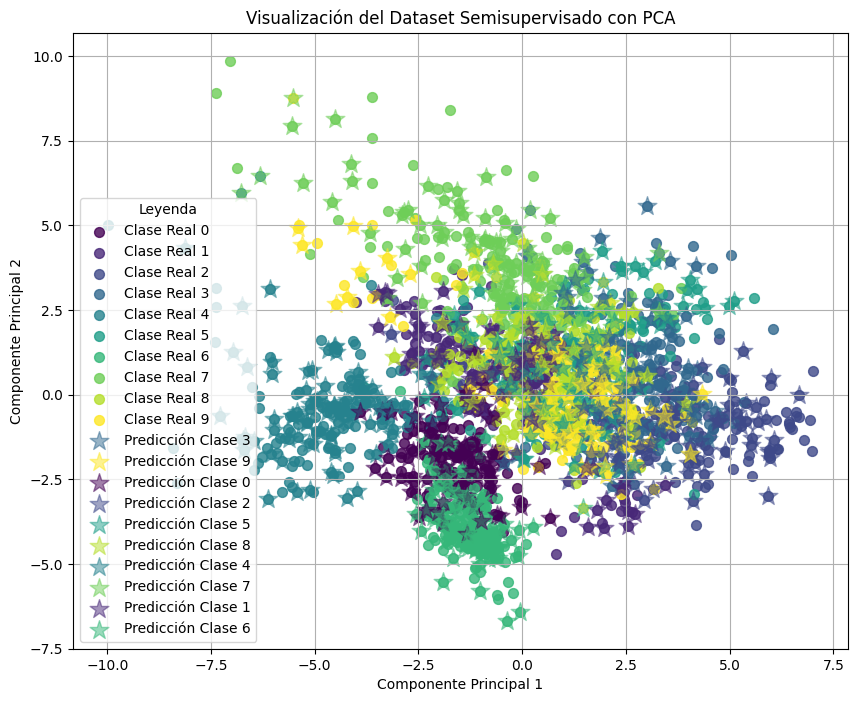

In [32]:
# Digits
Digits_y_pred = Digits_lp_model.predict(Digits_X_SSL)
visualizar_resultados_SSL(Digits_X_SSL, Digits_y_real.values.flatten(), Digits_y_pred, Digits_SSL_indices)

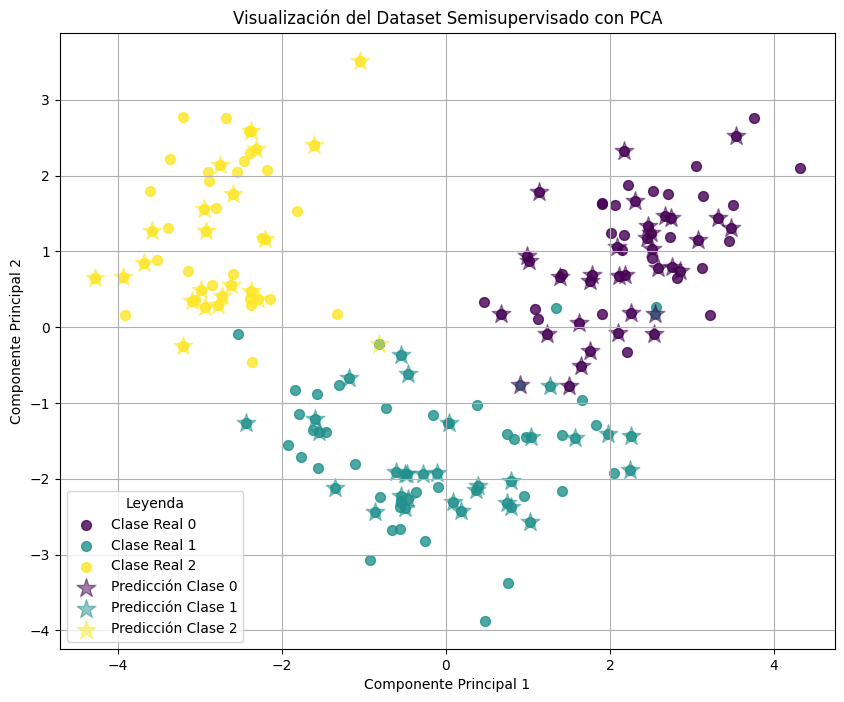

In [33]:
# Wine
Wine_y_pred = Wine_lp_model.predict(Wine_X_SSL)
visualizar_resultados_SSL(Wine_X_SSL, Wine_y_real.values.flatten(), Wine_y_pred, Wine_SSL_indices)

## Evaluación del algoritmo de Label Propagation

### Matriz de Confusión

[[50  0  0]
 [ 0 49  1]
 [ 0  7 43]]


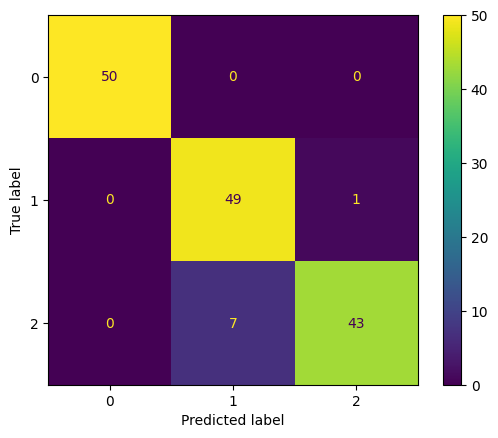

In [34]:
# Iris
Iris_cm = confusion_matrix(Iris_y_real.values.flatten(), Iris_y_pred)
print(Iris_cm)
ConfusionMatrixDisplay(confusion_matrix=Iris_cm).plot()

[[178   0   0   0   0   0   0   0   0   0]
 [  0 178   2   0   0   0   1   0   1   0]
 [  0   3 167   0   0   0   0   1   6   0]
 [  0   0   1 170   0   0   0   5   5   2]
 [  0   1   0   0 174   0   0   3   3   0]
 [  0   1   0   0   1 174   1   0   0   5]
 [  1   0   0   0   0   0 180   0   0   0]
 [  0   0   0   0   1   1   0 176   1   0]
 [  0  13   1   2   0   0   0   0 158   0]
 [  0   1   0   2   0   2   1   4   8 162]]


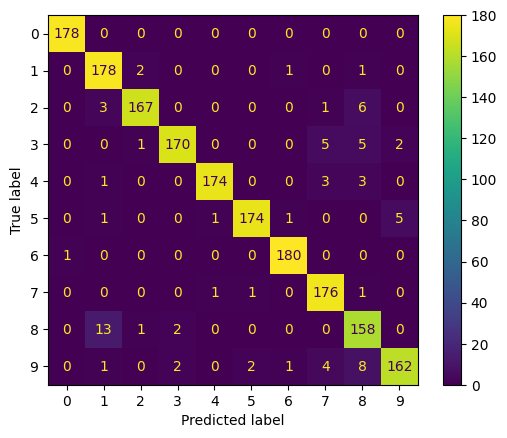

In [35]:
# Digits
Digits_cm = confusion_matrix(Digits_y_real.values.flatten(), Digits_y_pred)
print(Digits_cm)
ConfusionMatrixDisplay(confusion_matrix=Digits_cm).plot()

[[59  0  0]
 [ 3 66  2]
 [ 0  0 48]]


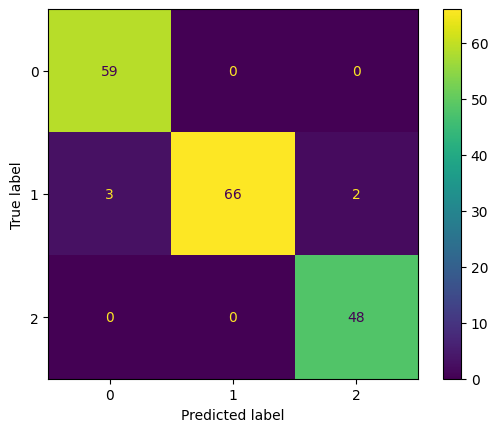

In [36]:
# Wine
Wine_cm = confusion_matrix(Wine_y_real.values.flatten(), Wine_y_pred)
print(Wine_cm)
ConfusionMatrixDisplay(confusion_matrix=Wine_cm).plot()

### Metrics Report

In [37]:
# Iris_report
Iris_report = classification_report(Iris_y_real.values.flatten(), Iris_y_pred)
print(Iris_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.88      0.98      0.92        50
           2       0.98      0.86      0.91        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [38]:
# Digits Report
Digits_report = classification_report(Digits_y_real.values.flatten(), Digits_y_pred)
print(Digits_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       0.90      0.98      0.94       182
           2       0.98      0.94      0.96       177
           3       0.98      0.93      0.95       183
           4       0.99      0.96      0.97       181
           5       0.98      0.96      0.97       182
           6       0.98      0.99      0.99       181
           7       0.93      0.98      0.96       179
           8       0.87      0.91      0.89       174
           9       0.96      0.90      0.93       180

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96      1797



In [39]:
# Wine Report
Wine_report = classification_report(Wine_y_real.values.flatten(), Wine_y_pred)
print(Wine_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.93      0.96        71
           2       0.96      1.00      0.98        48

    accuracy                           0.97       178
   macro avg       0.97      0.98      0.97       178
weighted avg       0.97      0.97      0.97       178



## Conclusiones

Vemos que los resultados del algoritmo de Label Propagation es levemente inferior que el de SelfTraining para los datasets que hemos elegido. Lo que puede indicar que algunos datos no son tan similares entre sí para poder propagar las etiquetas